# Import Telemetry class
NB: timing for processing, cropping, packing and compressing is not implemented yet.

In [1]:
from TMclass import *
import datetime

# Main Classes
## PHI_MEMORY
Insert a starting reference date<br />
PHI_MEMORY variable has two instances: `part1` and `part2`<br />
Each instance has the same sub-instances.

In [2]:
start_date = datetime.datetime(2022,1,19,0,0,0)
PHI = PHI_MEMORY(start_date)

[print(i) for i in PHI.part1.__dir__()];

total
free
occu
flush
raw
proc
compr
cal
crop
pack
history
__module__
__dict__
__weakref__
__doc__
__repr__
__hash__
__str__
__getattribute__
__setattr__
__delattr__
__lt__
__le__
__eq__
__ne__
__gt__
__ge__
__init__
__new__
__reduce_ex__
__reduce__
__subclasshook__
__init_subclass__
__format__
__sizeof__
__dir__
__class__


## PHI_MODE
Insert an observation mode: `FDT`,`HRT`, `CAL` or `FLUSH`

In [3]:
phi_mode = PHI_MODE('FDT')

### Run an Observation 
**def** observation(`start`,`end`,`cadence`,`shape`=(`<y pixels>`,`<x pixels>`,`<polarimetric modulations>`,`<wavelengths>`))<br />
output: keywords for PHI_MEMORY variable<br />
Method `observation` creates a new instance variable `raw`: PHI_MODE.raw <br />
The `raw` instance has several sub-instance variables

In [4]:
obsARGS = {'start':datetime.datetime.fromisoformat('2022-01-20T00:00:00'),
           'end':datetime.datetime.fromisoformat('2022-01-24T00:00:00'),
           'cadence':1,
           'shape':(2048,768,1,6)}

kw = phi_mode.observation(**obsARGS)

[print(i,':',v) for i,v in kw.items()]
print('====================')
[print(i) for i in phi_mode.raw.__dir__()];

tm_type : <class 'TMclass.RAW'>
val : 276480
key : raw
start : 2022-01-20 00:00:00
end : 2022-01-24 00:00:00
cadence
start
end
n_bits
X
Y
P
L
n_pix
n_outputs
n_datasets
this_run
metadata
data
data_tot
__module__
__call__
__dict__
__weakref__
__doc__
__repr__
__hash__
__str__
__getattribute__
__setattr__
__delattr__
__lt__
__le__
__eq__
__ne__
__gt__
__ge__
__init__
__new__
__reduce_ex__
__reduce__
__subclasshook__
__init_subclass__
__format__
__sizeof__
__dir__
__class__


In [5]:
phi_mode.raw.__call__()

Variable info: 
Variable type: <class 'TMclass.RAW'>
Start date: 2022-01-20 00:00:00
End date: 2022-01-24 00:00:00
Cadence: 1 mins
Shape: (2048,768,1,6)
Bit depth: 32
Number of raw datasets: 5760
Raw data+metadata size: 230400 MB
Raw metadata size: 46080 MB


### Insert the observation in the PHI_MEMORY variable
**def** saving(`index`,`tm_type`,`val`,`key`,`start`,`end`))<br />
`index`: 1 if datasets are saved in the partition 1, 2 for the partition 2 <br />
`tm_type`: type of variable <br />
`val`: value of memory usage in MB <br />
`key`: keyword to insert `val` in the variable
`start`: start datetime of PHI_MODE variable

In [6]:
PHI.saving(1,**kw)

PHI.__call__(1,history=True)

256000.0 MB in partition 1
276480.0 MB used in partition 1
-20480.0 MB free in partition 1
276480 MB used by raw data in partition 1
0 MB used by cropped data in partition 1
0 MB used by processed data in partition 1
0 MB used by packed data in partition 1
0 MB used by compressed data in partition 1
0 MB used by calibration data in partition 1
0 MB to be flushed in partition 1
history:
occu : [0, 276480]
raw : [0, 276480]
proc : [0, 0]
compr : [0, 0]
crop : [0, 0]
cal : [0, 0]
flush : [0, 0]
pack : [0, 0]
start : [datetime.datetime(2022, 1, 19, 0, 0), datetime.datetime(2022, 1, 20, 0, 0)]
end : [datetime.datetime(2022, 1, 19, 0, 0), datetime.datetime(2022, 1, 24, 0, 0)]
type : [<class 'TMclass.PHI_MEMORY'>, <class 'TMclass.RAW'>]


### Processing/Cropping/Packing/Compressing the dataset
Other modules are in `PHI_MODE` variables.<br />
<br />
**def** cropping(`start`,`crop`,`ndata`=-1,`level`='raw') <br />
`start`: starting datetime of the cropping <br />
`crop`: list with 2 numbers which represent the new (Y,X) shape <br />
`ndata`: number of data to be cropped. If -1 it will cropped the whole dataset <br />
`level`: where the cropping has to be applied (usually 'raw')<br />
<br />
**def** packing(`start`,`ndata`=-1,`level`='raw.crop') <br />
'raw.crop' means that it is going to pack cropped-raw data <br />
<br />

**def** processing(`start`,`ndata=-1`,`partialStore`=0x00,`nout`=5,level='raw') <br />
`partialStore`: 0x00 if 1 intermediate output per data during the processing; 0xFF if 5 intermediate outputs per data during the processing <br />
`nout`: number of outputs at the end of the processing (16 bits; usually 3 or 5)<br />
<br />
**def** compressing(`start`,`nbits`,`ndata`,`level = 'proc'`)<br />
`nbits`: it should be 2,3,4,5,6 or 16
<br />
<br />
***`cropping` and `packing` create sub-instances in `RAW`, `PROC` and `COMPR` classes***


In [7]:
cropARGS = {'start': phi_mode.raw.end,
            'ndata':-1,
            'crop':[768,768],
            'level':'raw'}
procARGS = {'start': phi_mode.raw.end,
            'ndata':-1,
            'partialStore':0x00,
            'nout':5,
            'level':'raw'}
kw = phi_mode.processing(**procARGS)
phi_mode.proc.__call__()

kw = phi_mode.cropping(**cropARGS)
PHI.saving(1,**kw)

packARGS = {'start': phi_mode.raw.crop.end,
            'ndata':-1,
            'level':'raw.crop'}

kw = phi_mode.packing(**packARGS)
PHI.saving(1,**kw)

comprARGS = {'start': phi_mode.raw.pack.end,
            'ndata':-1,
            'nbits':6,
            'level':'raw.pack'}

kw = phi_mode.compressing(**comprARGS)
PHI.saving(1,**kw)

phi_mode.compr.pack.__call__()

Variable info: 
Variable type: <class 'TMclass.PROC'>
Start date: 2022-01-24 00:00:00
End date: 2022-07-03 00:00:00
Processing time per data: 0:40:00 mins
X crop factor: 768
Y crop factor: 2048
Number of outputs: 5
Intermediate steps: 1
Bit depth: 16
Bit depth for intermediate data: 32
Number of processed datasets: 5760
Processed data+metadata size: 138240 MB
Variable info: 
Variable type: <class 'TMclass.PACK'>
Start date: 2022-02-01 00:00:00
End date: 2022-02-05 00:00:00
Packing time per data: 0:01:00 mins
X crop factor: 768
Y crop factor: 768
Number of outputs: 6
Bit depth: 6
Number of packed datasets: 5760
Packed data+metadata size: 19320.23808 MB


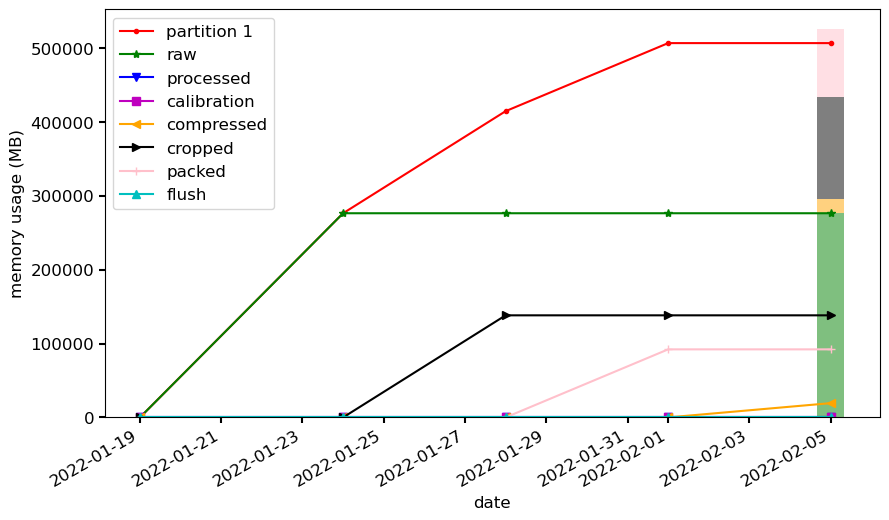

In [8]:
_ = PHI.plot(1, bar=True)

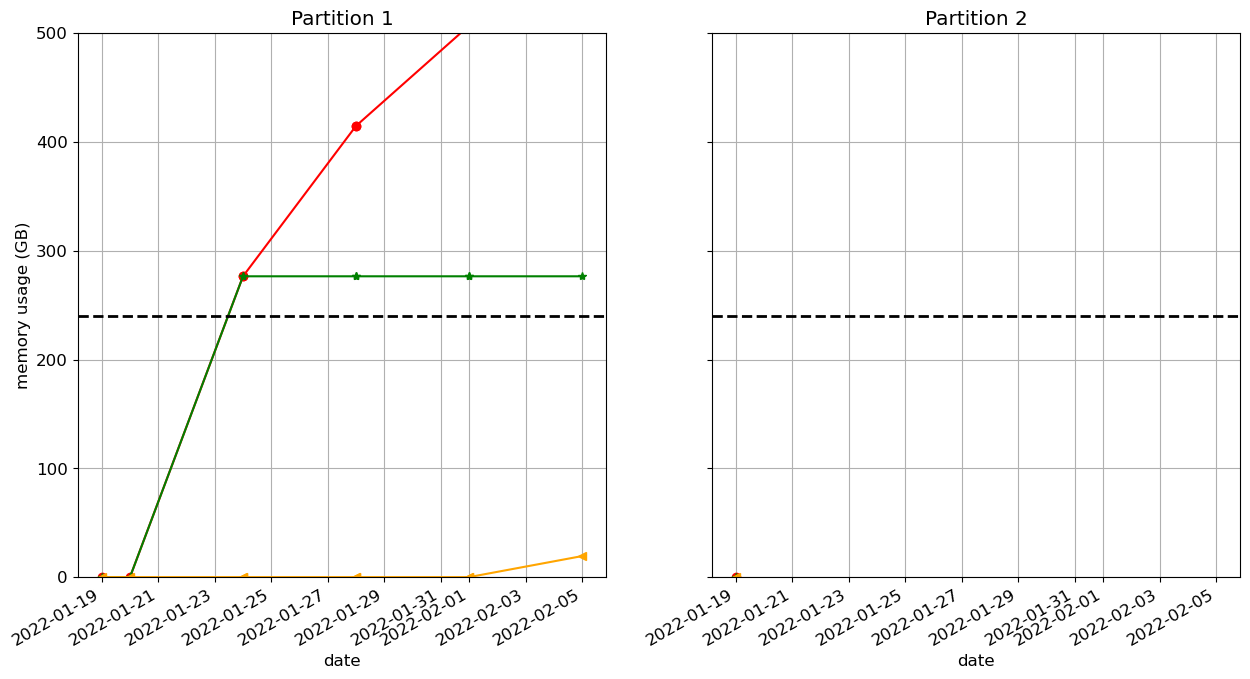

In [9]:
plot_tot(PHI, ylim=(0,500), xlim=None)

In [10]:
printp(phi_mode)


number of datasets: 5760
cadence: 1 mins
duration: 4 days, 0:00:00
amount of raw-data at 32 bits: 219726.6 MiB, 38.1 MiB per dataset
amount of crop-data at 32 bits: 87890.6 MiB, 15.3 MiB per dataset
amount of pack-data at 16 bits: 43945.3 MiB, 7.6 MiB per dataset
amount of processed data (and intermediate data) at 16 bits: 307617.2 MiB, 15.3 MiB per dataset
amount of compressed data + metadata at 6 bits: 18425.2 MiB, 3.2 MiB per dataset
amount of metadata:  184320 MiB
amount of memory usage: 878906.2 MiB


### Saving and loading PHI_MEMORY variable
Saving is possible in `.pkl` and `.csv` format. <br />
Loading is possible from `.pkl` files (`.csv` available soon). It can be done by initializing the variable from a `.pkl` file.

In [11]:
# saving
fname = '/home/calchetti/PHI.csv'
PHI.save(fname, overwrite=True)
# or
fname = '/home/calchetti/PHI.pkl'
PHI.save(fname, overwrite=True)

# loading
PHI = PHI_MEMORY(fname)